In [1]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("adilshamim8/startup-growth-and-investment-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Kavishka Fernando\.cache\kagglehub\datasets\adilshamim8\startup-growth-and-investment-data\versions\1


In [2]:
dataset_folder = r"C:\Users\Kavishka Fernando\.cache\kagglehub\datasets\adilshamim8\startup-growth-and-investment-data\versions\1"

# List all files in the folder
csv_files = [f for f in os.listdir(dataset_folder) if f.endswith(".csv")]

# Ensure there's at least one CSV file
if len(csv_files) == 1:
    dataset_path = os.path.join(dataset_folder, csv_files[0])  # Select the first CSV file
    df = pd.read_csv(dataset_path)
    print("Dataset Loaded!")
    
    # Display dataset info
    print(df.info())
    print(df.head())  # Show first few rows
else:
    print("No CSV file found")

Dataset Loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   float64
 4   Valuation (USD)          5000 non-null   float64
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 351.7+ KB
None
  Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
0    Startup_1  Blockchain               8             1.335166e+09   
1    Startup_2        SaaS               2             2.781498e+09   
2 

In [3]:
print(df.isnull().sum())

# Check for duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")

Startup Name               0
Industry                   0
Funding Rounds             0
Investment Amount (USD)    0
Valuation (USD)            0
Number of Investors        0
Country                    0
Year Founded               0
Growth Rate (%)            0
dtype: int64
Duplicate Rows: 0


In [4]:
print(df.dtypes)  # Check data types

Startup Name                object
Industry                    object
Funding Rounds               int64
Investment Amount (USD)    float64
Valuation (USD)            float64
Number of Investors          int64
Country                     object
Year Founded                 int64
Growth Rate (%)            float64
dtype: object


In [5]:
print(df.isnull().sum())  # Check for missing values

Startup Name               0
Industry                   0
Funding Rounds             0
Investment Amount (USD)    0
Valuation (USD)            0
Number of Investors        0
Country                    0
Year Founded               0
Growth Rate (%)            0
dtype: int64


In [6]:
df = pd.get_dummies(df, columns=["Industry", "Country"], drop_first=True) # One-hot encode categorical columns as these do not have ranking bias I chosed one hot encoding


In [7]:
# Summary statistics for numerical columns
print(df.describe())


       Funding Rounds  Investment Amount (USD)  Valuation (USD)  \
count     5000.000000             5.000000e+03     5.000000e+03   
mean         5.491600             2.455567e+09     7.971059e+09   
std          2.913353             1.423787e+09     5.479487e+09   
min          1.000000             1.102610e+06     1.722547e+06   
25%          3.000000             1.221506e+09     3.598305e+09   
50%          6.000000             2.460634e+09     7.002304e+09   
75%          8.000000             3.639951e+09     1.147676e+10   
max         10.000000             4.999544e+09     2.470906e+10   

       Number of Investors  Year Founded  Growth Rate (%)  
count          5000.000000   5000.000000      5000.000000  
mean             25.542000   2011.544000       102.091732  
std              14.271838      6.885285        56.179781  
min               1.000000   2000.000000         5.060000  
25%              13.000000   2006.000000        52.815000  
50%              25.000000   2012.00

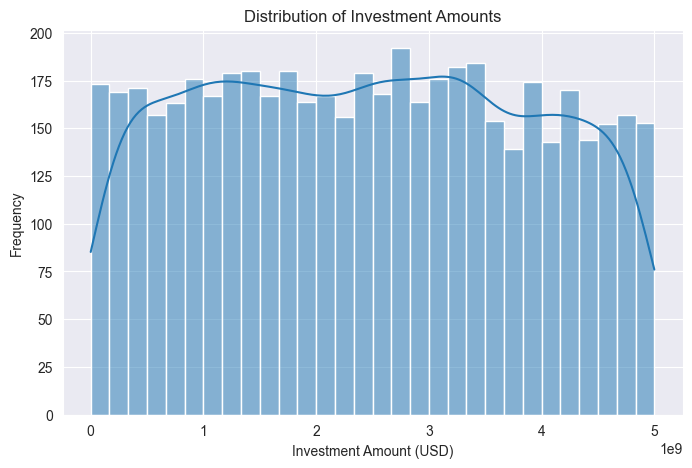

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Investment Amount
plt.figure(figsize=(8, 5))
sns.histplot(df["Investment Amount (USD)"], bins=30, kde=True)
plt.title("Distribution of Investment Amounts")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Frequency")
plt.show()


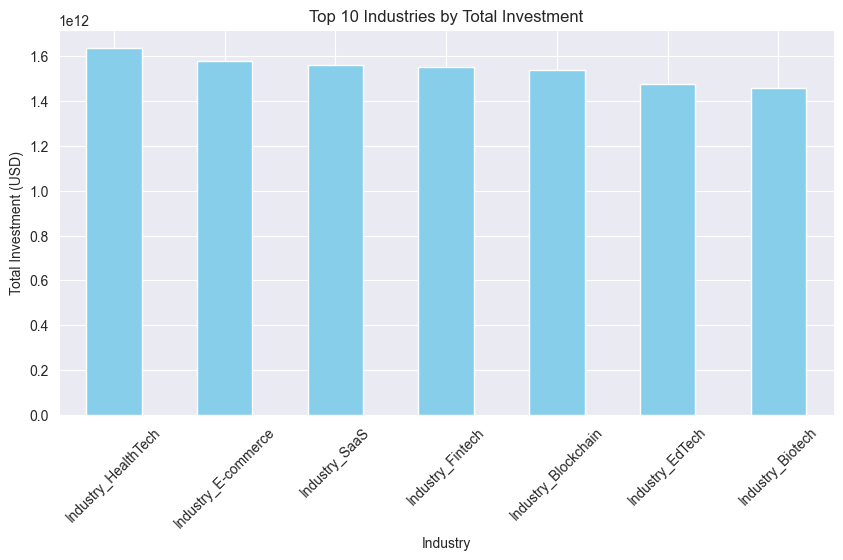

In [9]:
# Identify industry-related columns (after one-hot encoding)
industry_columns = [col for col in df.columns if col.startswith("Industry_")]

# Create a dictionary to store total funding for each industry
industry_funding = {}

for industry in industry_columns:
    total_funding = (df[industry] * df["Investment Amount (USD)"]).sum()  # Multiply and sum
    industry_funding[industry] = total_funding

# Convert to a Pandas Series and sort values
industry_funding = pd.Series(industry_funding).sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt

# Round the investment values to 2 decimal places for better readability
industry_funding = industry_funding.round(2)

# Plot
plt.figure(figsize=(10, 5))
industry_funding.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Industries by Total Investment")
plt.xlabel("Industry")
plt.ylabel("Total Investment (USD)")
plt.xticks(rotation=45)
plt.show()


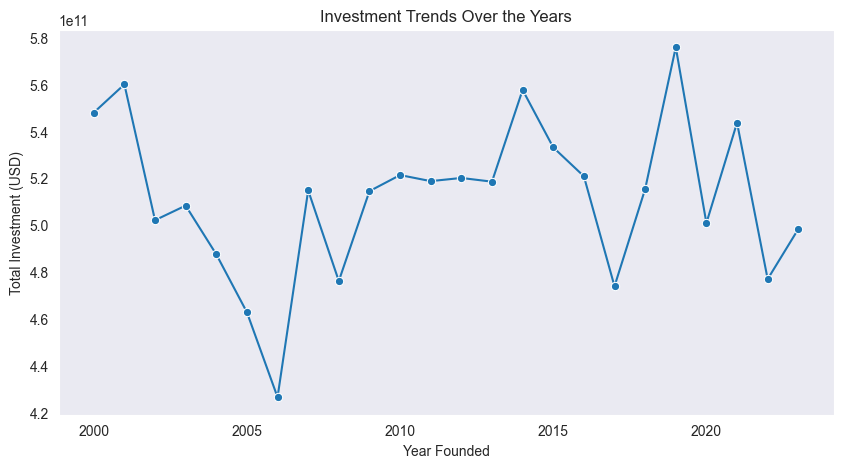

In [10]:
# Yearly total funding trend
yearly_funding = df.groupby("Year Founded").sum()["Investment Amount (USD)"]

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_funding.index, y=yearly_funding.values, marker="o")
plt.title("Investment Trends Over the Years")
plt.xlabel("Year Founded")
plt.ylabel("Total Investment (USD)")
plt.grid()
plt.show()


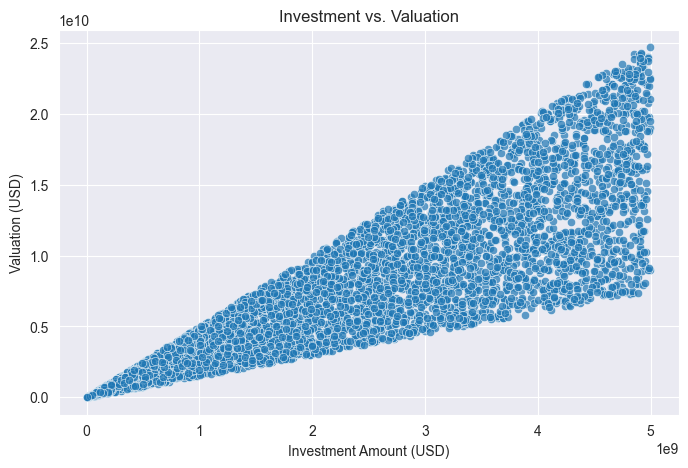

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Investment Amount (USD)"], y=df["Valuation (USD)"], alpha=0.7)
plt.title("Investment vs. Valuation")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Valuation (USD)")
plt.show()


In [12]:
print(df)


      Startup Name  Funding Rounds  Investment Amount (USD)  Valuation (USD)  \
0        Startup_1               8             1.335166e+09     6.621448e+09   
1        Startup_2               2             2.781498e+09     8.363214e+09   
2        Startup_3              10             3.309032e+09     1.548270e+10   
3        Startup_4               5             4.050196e+09     1.268253e+10   
4        Startup_5               9             1.645080e+09     6.887966e+09   
...            ...             ...                      ...              ...   
4995  Startup_4996               5             4.015771e+09     1.212346e+10   
4996  Startup_4997               2             3.619535e+09     1.107936e+10   
4997  Startup_4998              10             4.257640e+08     8.277586e+08   
4998  Startup_4999               4             4.220592e+08     1.895497e+09   
4999  Startup_5000               5             1.208767e+09     2.265635e+09   

      Number of Investors  Year Founded